In [8]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

def get_theta(X, y, eps, alpha): 
    theta = np.array([[0], [0], [0], [0]])
    cost = 1
    ite = 0
    while 1:
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        
        m = h_y_diff.shape[1]
        theta = theta - ((alpha * gradient.T) / m) 
        
        previousCost = cost
        cost = calculate(X, y, theta)
        ite = ite + 1
        
        if abs(previousCost - cost) < eps or ite > 2000000:
            break
    return theta, cost

In [9]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])
    
X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

eps = 1e-9  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.0035  # learning rate
theta = np.array([[0], [0], [0], [0]])
theta, cost = get_theta(X, y, eps, alpha)
print(theta, cost)


[[-11.8748638 ]
 [ 17.36882849]
 [ 12.43206881]
 [ -4.6852268 ]] 0.19004429157249067


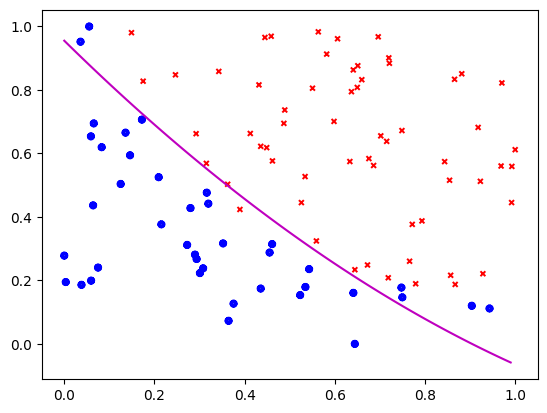

In [10]:
# print(x1_db)

x1_db = np.arange(X[1, :].min(), X[1, :].max(), 0.01)
x2_db = -(theta[0, 0] + theta[1, 0]*x1_db + theta[3, 0]*x1_db**2) / theta[2, 0]

plt.scatter(X[1], X[2], y, marker="x", linewidths=5, color="r")
plt.scatter(X[1], X[2], 1-y, marker="*", linewidths=5, color="b")
plt.plot(x1_db, x2_db, '-m')
plt.show()